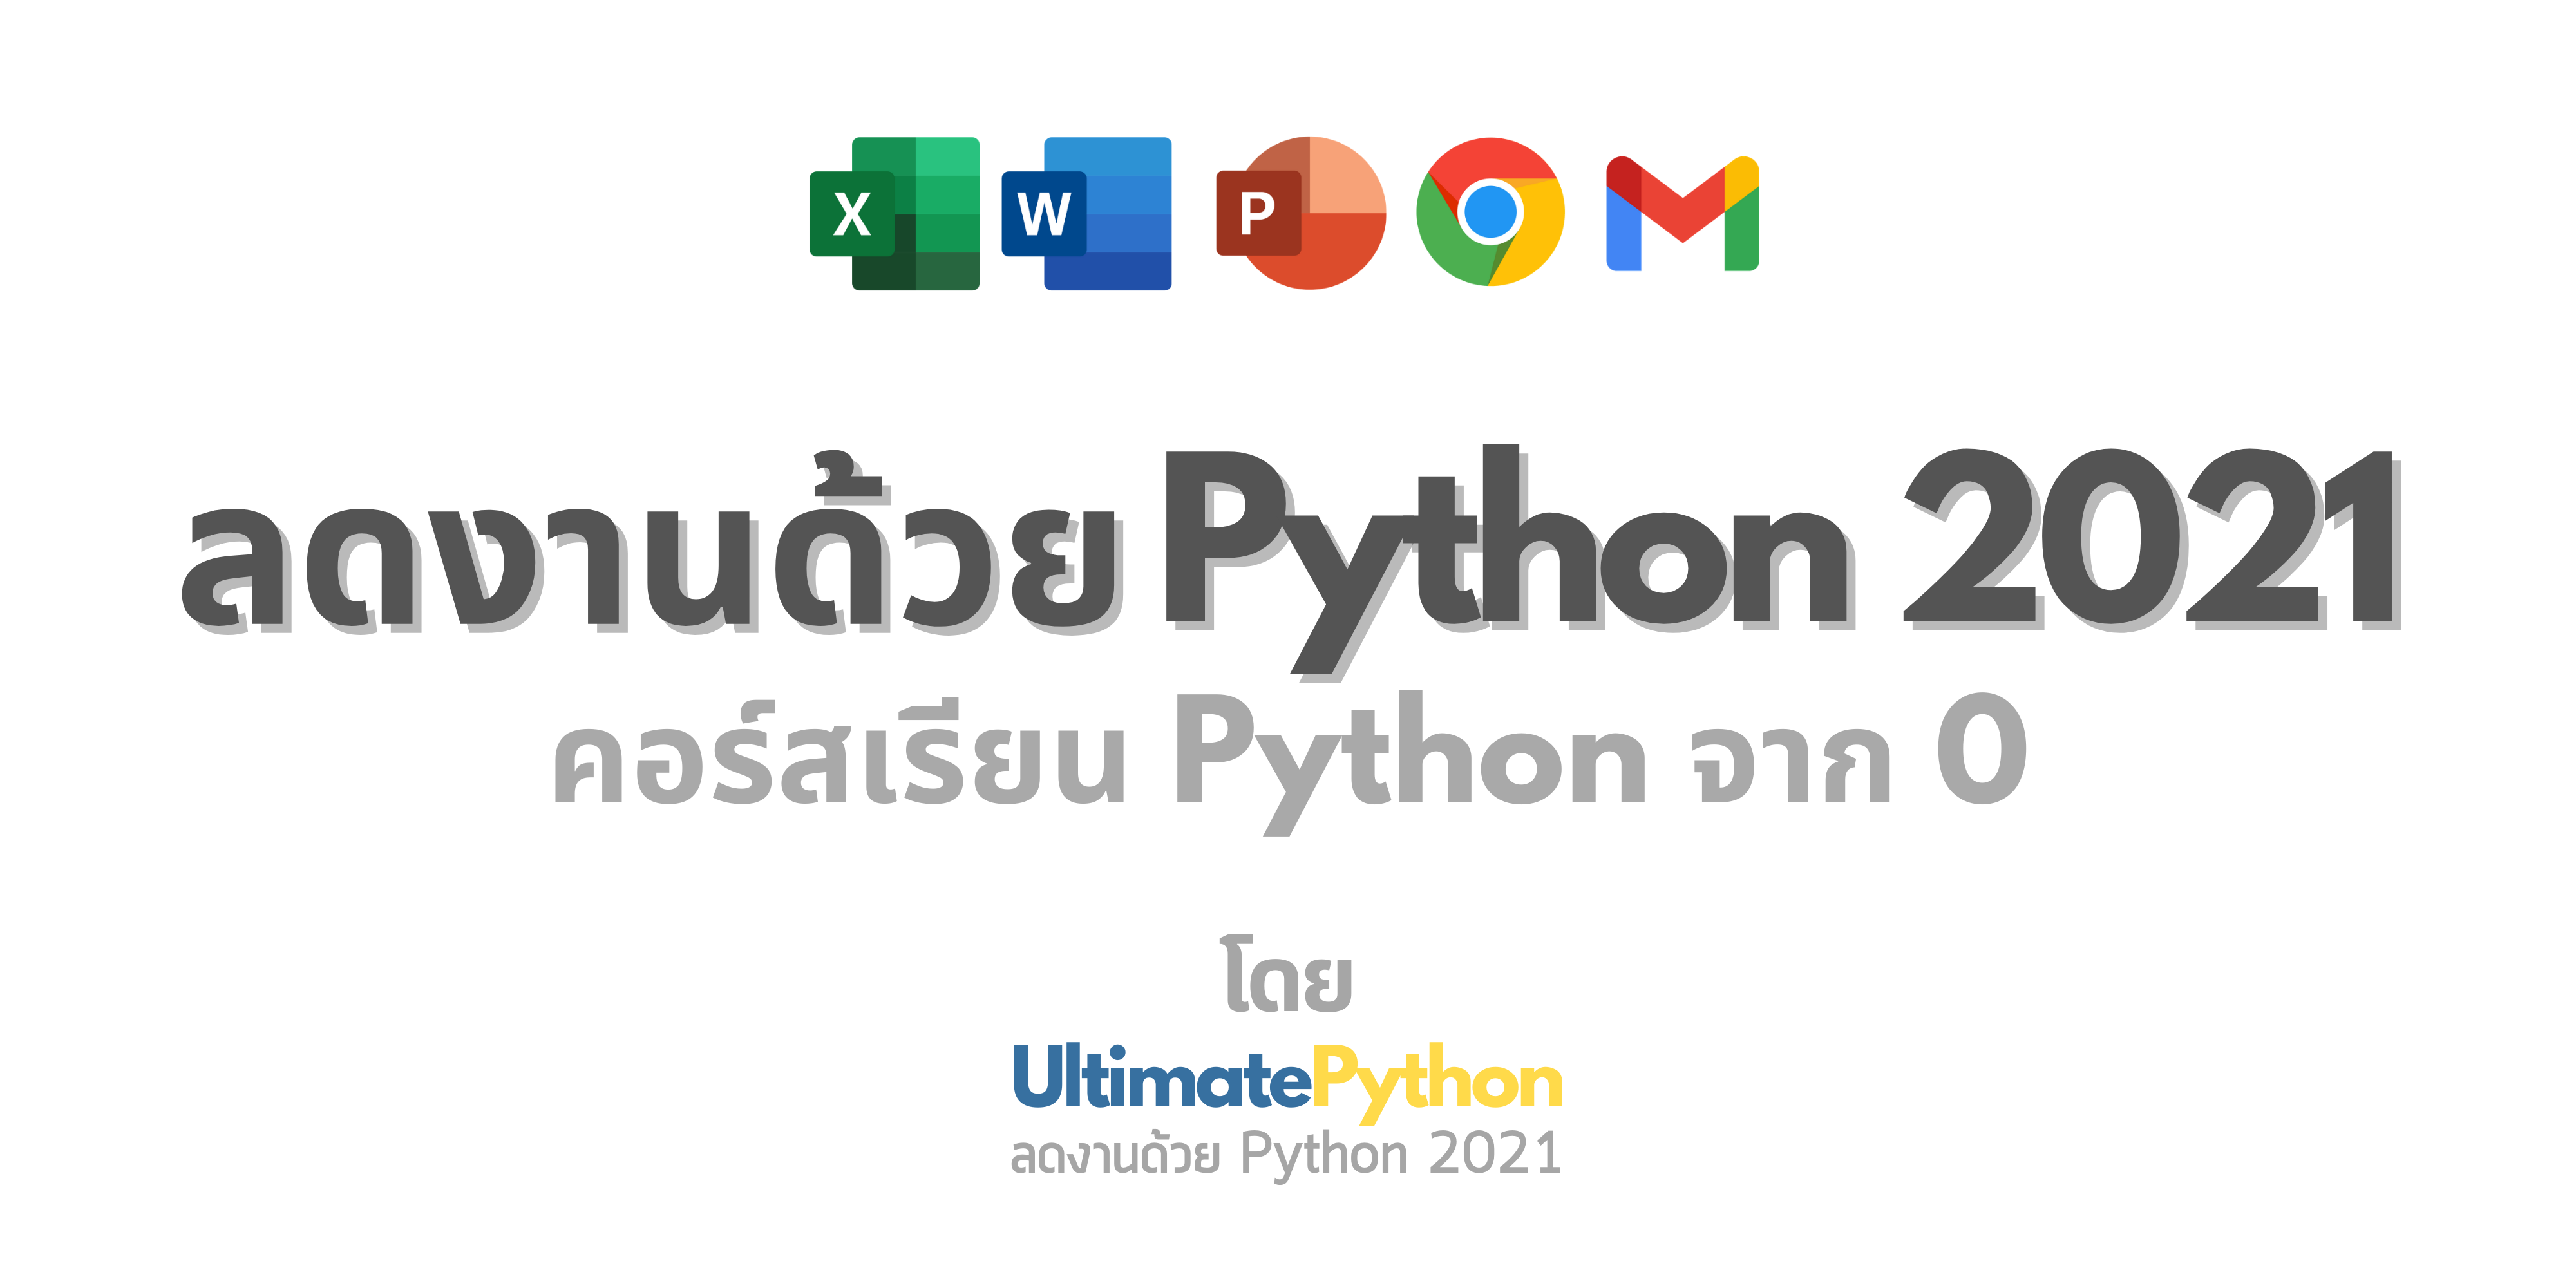

# การทำงานบน Excel

ที่คุณเองก็ทำทุกวัน ไม่ว่าจะเป็นการดึงข้อมูล การรวมไฟล์ การสร้างรายงาน การคำนวน หรือแม้แต่การเอาข้อมูลจาก Excel ไปใช้เขียน Email เขียนเอกสาร เรียกได้ว่าทำ Excel เป็นงานหลักก็อาจจะไม่แปลกนัก

ซึ่งหลังจากที่คุณใช้ Excel มาสักพัก จากตอนแรกที่ใช้เมาส์คลิกทุกอย่าง ก็เริ่มมีการใช้คีย์ลัด จนถึงการใช้งานโดยไม่ต้องใช้เมาส์ และการใช้ Macro VBA เพื่อทำคำสั่งสิ่งต่างๆ แทนคนในคลิกเดียว

Python เป็นสิ่งที่เรียนเพื่อทดแทน Macro VBA ได้จาก 0 เลย และเหนือกว่าที่สามารถทำงานเกี่ยวกับอย่างอื่นนอกเหนือจากไฟล์ Excel ไปได้อีกด้วย ไม่ว่าจะนำไปเชื่อมกับเอกสาร ส่งอีเมล์

# สร้างรายงานจาก Excel

Python เพียงระดับพื้นฐาน สามารถประยุกต์ใช้สร้างโปรแกรมทำงานบน Excel แทนคุณได้ทันที วันนี้ [Ultimate Python](https://www.facebook.com/ultimatepython) จะพามาดูตัวอย่างการสร้างโปรแกรมทำงาน Excel แทนโดยใช้ Python

เราจะจำลองว่าคุณต้องนำไฟล์ Excel ที่เก็บยอดขายจากสาขาย่อย 4 ไฟล์ มาหาผลรวมและสร้างเป็น Excel รวมยอดเพื่อส่งเป็นรายงานให้กับหัวหน้าต่อไป

ถ้าคุณอยากออกแบบโปรแกรมแบบนี้ สร้างออกมาใช้กับงานทั่วไปในทุกวัน เรียนกับคอร์ส ลดงานด้วย Python 2021 ได้จาก 0 จนออกแบบสร้างใช้งานได้จริง พร้อม 6 Workshops ที่เราจะสร้างโปรแกรมแบบนี้ให้ทุกคุณนำไปใช้ได้ทุกวัน

## การใช้งาน

หากต้องการทดลองใช้งานให้กด / คลิกที่สัญลักษณ์ `In [ ]` สีน้ำเงินด้านซ้ายของหน้ากระดาษนี้ และกดปุ่ม `Run` ตามด้านล่าง ทำซ้ำจนครบทุกอัน โดยจะต้องทำตามลำดับจากอันด้านบนลงไปด้านล่างของกระดาษ

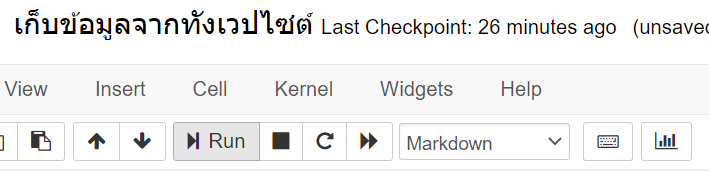

## ติดตั้ง และนำเข้าเครื่องมือที่ต้องใช้

การเก็บข้อมูลหน้าเวปใช้เครื่องมือหลัก 2 อัน pandas และ os ซึ่ง pandas เป็นเครื่องมือที่ใช้จัดการข้อมูลที่เป็นตารางที่เป็นพื้นฐานสำคัญของการทำงานกับ Data และ os ใช้เพื่อเปิดโฟลเดอร์ต่างๆ

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import os

## รวมไฟล์ Excel

การทำงานกับ Excel ของ Pandas จะใช้ Column และ Row เป็นการระบุข้อมูล สำหรับข้อมูลไหนที่มีชื่อ Column, Row เหมือนกัน จะถูกนำมาจัดการร่วมกันอย่างอัตโนมัติโดยทันที เช่น ในกรณีนำข้อมูลมาบวกกัน Pandas จะนำข้อมูลที่มี Column และ Row ตรงกันมาบวกกัน

การใช้งาน Python ขั้นพื้นฐาน สามารถทดแทนการทำงานบน Excel ได้เกือบ 100% นอกจากจะทำให้สามารถลดงานตรงนี้ไปได้แล้ว ประสบการณ์ที่ใช้ทำงานตรงนี้คุณยังสามารถนำไปต่อยอดเป็นทักษะอื่น และระบบที่ซับซ้อนกว่านี้ได้อีกด้วย

In [4]:
path = os.getcwd()
file_list = os.listdir(path)
table_list = []
for file in file_list:
    table = pd.read_excel(path+'/'+file).set_index('Product')
    table_list.append(table)
report = pd.DataFrame()
for table in table_list:
    report = report.add(table,fill_value=0)
report['All Year'] = report.sum(axis=1)
report.loc['All Product'] = report.sum(axis=0)

### ไฟล์แรกที่นำมารวม

In [5]:
table_list[0]

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),9555,5975,5595,9659
Celery Seed (Whole),7543,7346,3466,7474
Catnip Leaf,854,364,474,743
Cardamom Seed (Ground),844,848,457,744
Anise Seeds,734,457,327,235
Asafoetida Powder,688,468,874,568
Caraway Seed (Whole),676,856,855,866
Bay Leaf (Whole),667,799,750,575
Chamomile Flowers,553,474,632,474


### ไฟล์ที่สองที่นำมารวม

In [6]:
table_list[1]

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),6778,6760,4568,7834
Celery Seed (Whole),3634,6344,6423,2546
North Special,875,1452,254,2451
Catnip Leaf,854,364,474,743
Asafoetida Powder,654,634,326,754
Anise Seeds,534,423,521,625
Cardamom Seed (Ground),422,642,642,624
Chamomile Flowers,356,634,632,743
Caraway Seed (Whole),354,633,422,255


### ไฟล์ที่สามที่นำมารวม

In [7]:
table_list[2]

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),8566,9556,8554,7886
Celery Seed (Whole),8332,8372,7427,5783
South Special,4215,1245,3562,2154
Caraway Seed (Whole),854,966,673,755
Catnip Leaf,854,364,474,733
Anise Seeds,833,733,1065,1198
Cardamom Seed (Ground),822,583,833,834
Asafoetida Powder,753,844,1024,1157
Bay Leaf (Whole),577,855,844,734


### ไฟล์ที่สี่ที่นำมารวม

In [8]:
table_list[3]

,Qtr1,Qtr2,Qtr3,Qtr4
Product,,,,
Basil Leaf (Whole),4884,6460,4761,7738
Celery Seed (Whole),4723,6375,6381,2321
Catnip Leaf,885,374,448,731
Anise Seeds,624,501,554,618
Asafoetida Powder,579,589,329,729
Chamomile Flowers,489,641,594,626
West Special,457,358,658,842
Cardamom Seed (Ground),401,687,629,602
Caraway Seed (Whole),379,629,418,236


### รายงานที่ได้จากการรวม

In [9]:
report

,Qtr1,Qtr2,Qtr3,Qtr4,All Year
Product,,,,,
Anise Seeds,2725.0,2114.0,2467.0,2676.0,9982.0
Asafoetida Powder,2674.0,2535.0,2553.0,3208.0,10970.0
Basil Leaf (Whole),29783.0,28751.0,23478.0,33117.0,115129.0
Bay Leaf (Whole),1773.0,2780.0,2620.0,2607.0,9780.0
Caraway Seed (Whole),2263.0,3084.0,2368.0,2112.0,9827.0
Cardamom Seed (Ground),2489.0,2760.0,2561.0,2804.0,10614.0
Cardamom Seed (Whole),1277.0,2199.0,1618.0,2619.0,7713.0
Catnip Leaf,3447.0,1466.0,1870.0,2950.0,9733.0
Celery Seed (Whole),24232.0,28437.0,23697.0,18124.0,94490.0


# อยากออกแบบ สร้างเอง ปรับใช้งานได้จริง

สมัครเรียนในคอร์ส ลดงานด้วย Python 2021 [ทักหาเรา](https://www.facebook.com/ultimatepython/inbox)

เรียน Python จาก 0 ให้คุณสามารถออกแบบ และสร้างระบบลดงานรอบตัวของคุณ พร้อมต่อยอดไปสาขาอื่นๆ ด้วยหลักสูตรสำหรับมือใหม่โดยเฉพาะ แบบไม่มีจำกัดเวลา พร้อมการดูแล อัพเดทให้ตลอดปี 2021 [เรียนรู้เพิ่มเติม](https://www.ultimatepython.co)

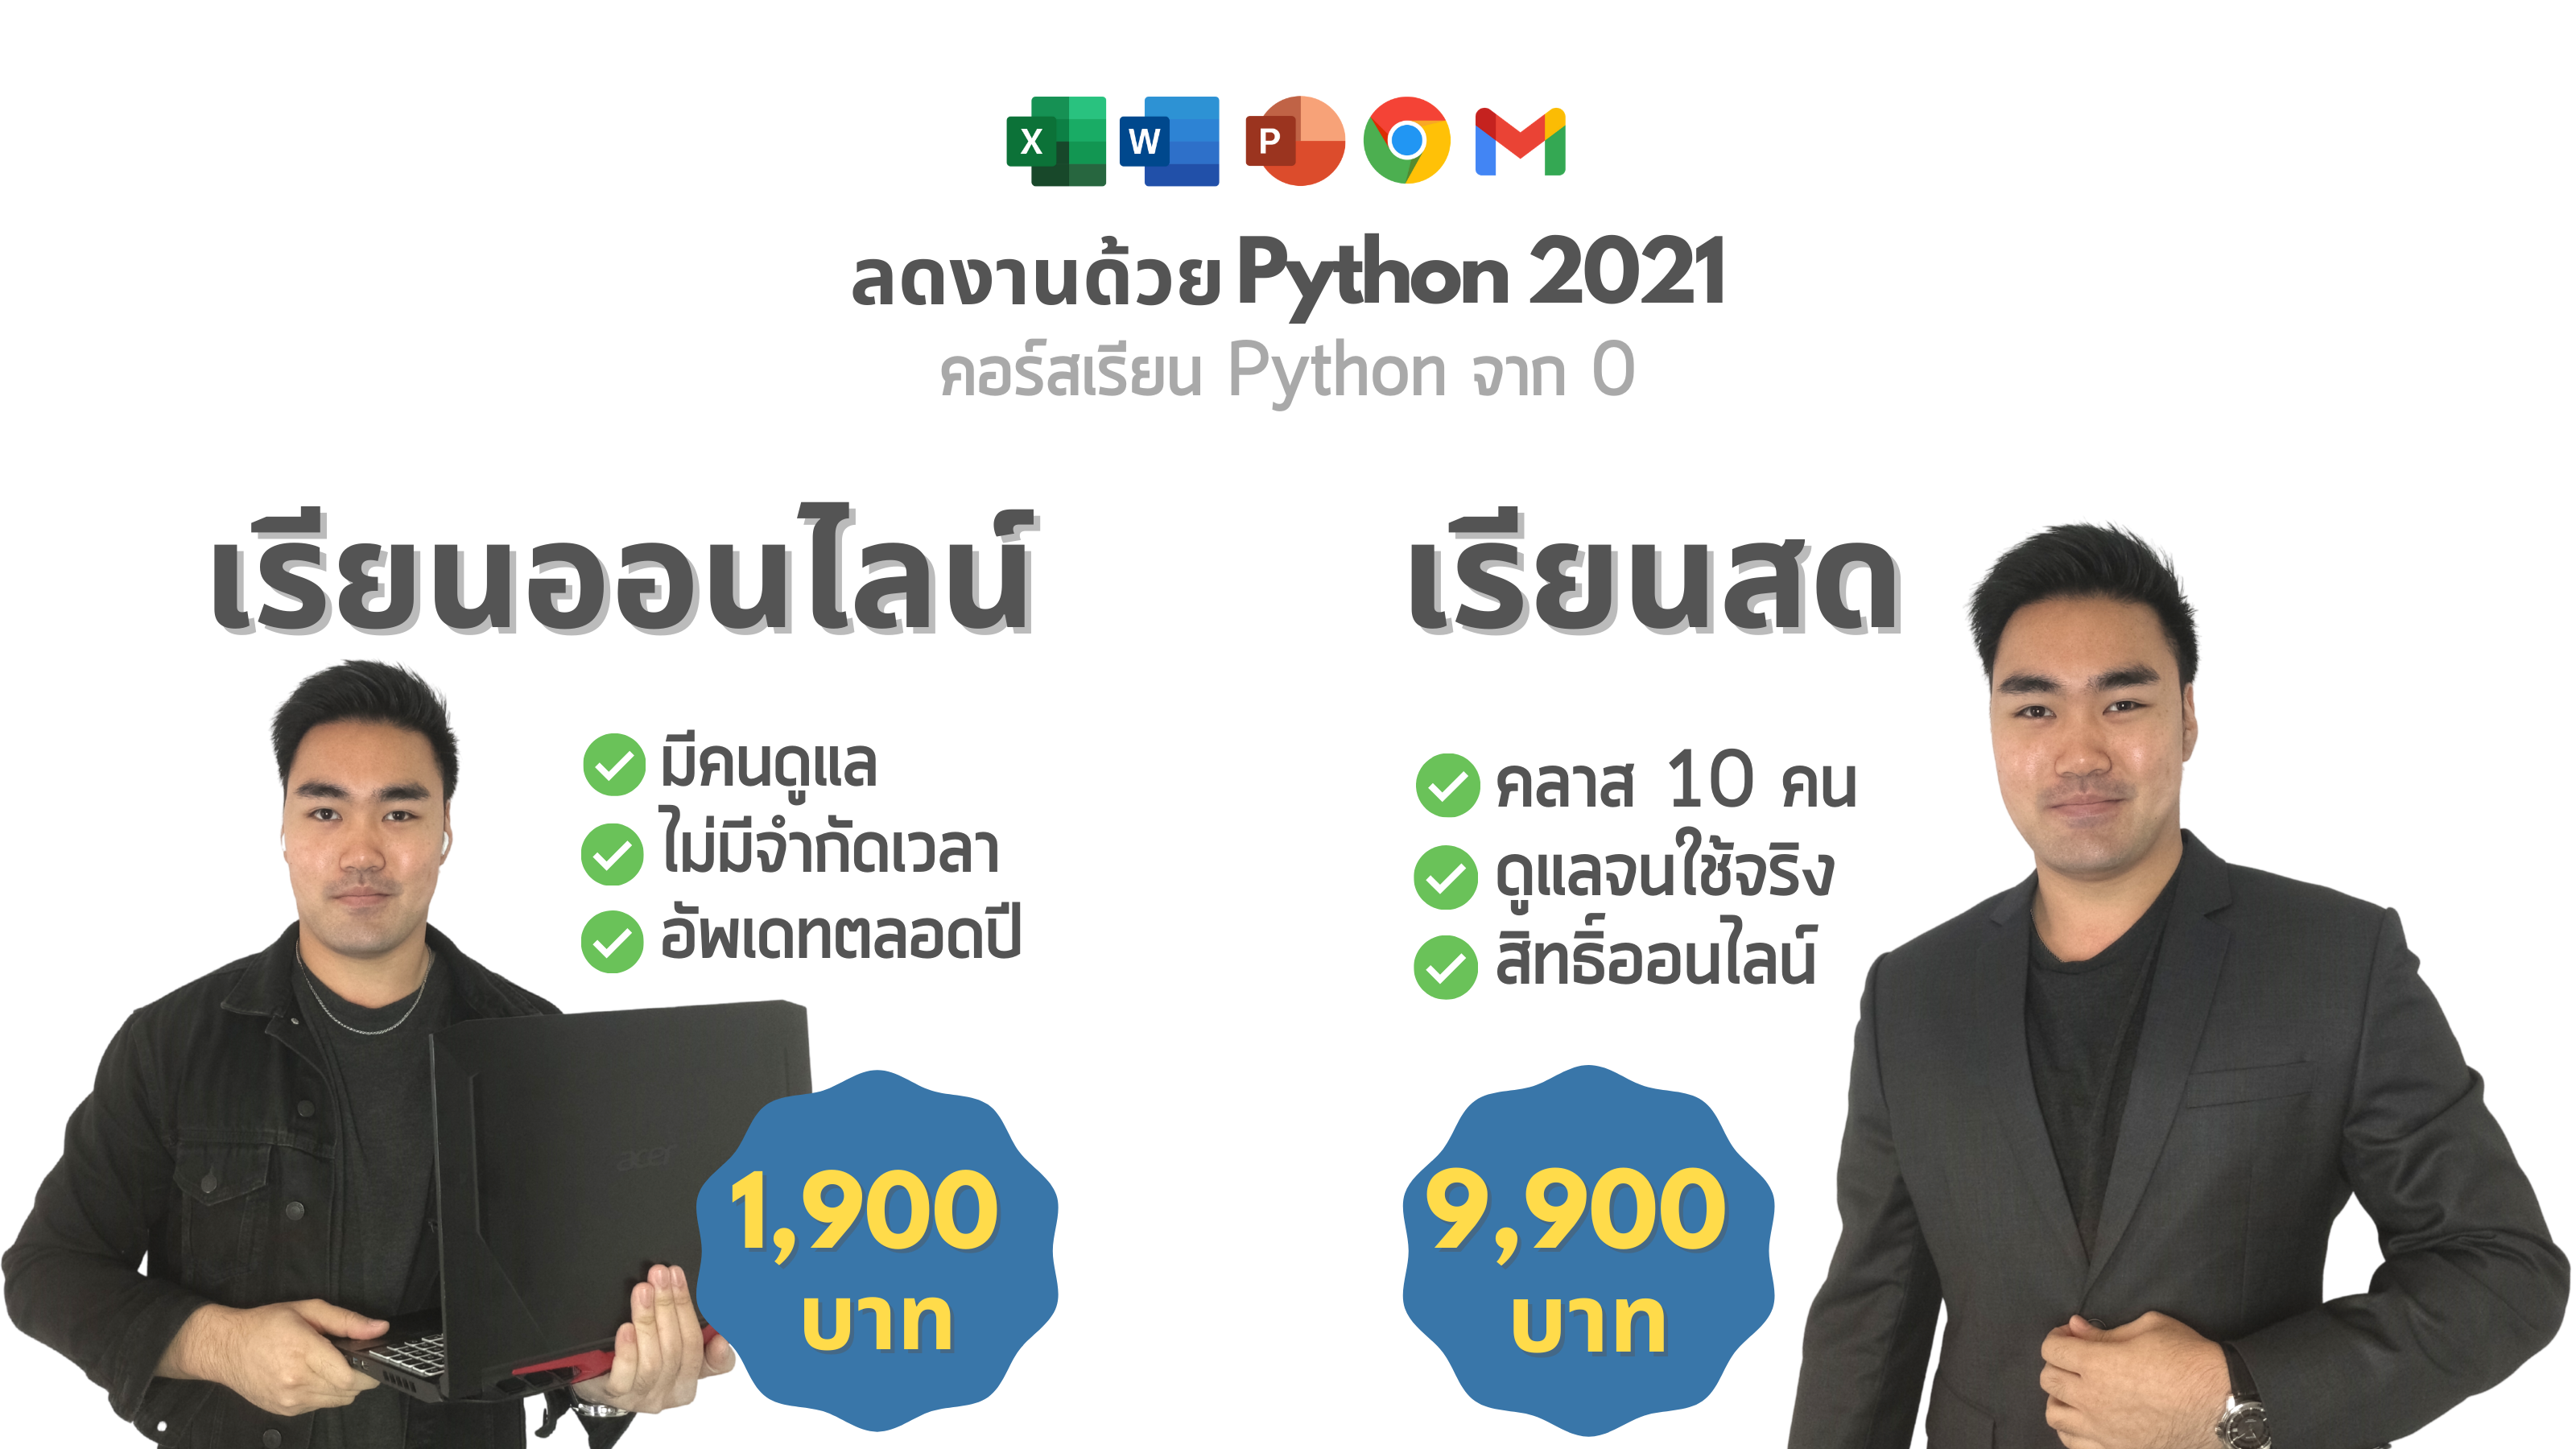